In [9]:
#mount your google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
!pip install ultralytics  #install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
!pip install split-folders

In [30]:
#split the images data to train and val
img_folder = '/content/drive/My Drive/yolo hat detection/data/images'
labels_folder = '/content/drive/My Drive/yolo hat detection/data/labels'
main_folder ='/content/drive/My Drive/yolo hat detection'


In [31]:
#confirm the documents in the path
!ls "/content/drive/My Drive/yolo hat detection"


 classes.txt   data   data.yaml  'detection training .ipynb'   notes.json


In [53]:
#confirm the documents in the path

!ls "/content/drive/My Drive/yolo hat detection/data"



images	labels


In [33]:
#confirm the documents in the path
!ls "/content/drive/My Drive/yolo hat detection/data/labels"



train  train.cache  val  val.cache


In [34]:
#begin training the model
import os

In [35]:

from ultralytics import YOLO
#options available yolov8n or yolov8s. going with the small cause of accuracy is quite important speed

model = YOLO('yolov8s.pt')

results = model.train(data = os.path.join(main_folder, 'data.yaml'), epochs = 20)

100%|██████████| 21.5M/21.5M [00:00<00:00, 131MB/s] 


Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/My Drive/yolo hat detection/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/My Drive/yolo hat detection/data/labels/train.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/yolo hat detection/data/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.479      3.264      1.651         31        640: 100%|██████████| 10/10 [06:20<00:00, 38.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:37<00:00, 18.69s/it]

                   all         40         49      0.819       0.72        0.7      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.304      1.728      1.388         41        640: 100%|██████████| 10/10 [06:03<00:00, 36.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.75s/it]

                   all         40         49      0.849      0.771      0.745      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.158      1.414      1.337         43        640: 100%|██████████| 10/10 [05:42<00:00, 34.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.62s/it]

                   all         40         49      0.913      0.682      0.746      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.139      1.304      1.245         52        640: 100%|██████████| 10/10 [05:43<00:00, 34.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.29s/it]

                   all         40         49      0.862      0.742      0.775      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.116      1.168      1.276         38        640: 100%|██████████| 10/10 [05:44<00:00, 34.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.56s/it]

                   all         40         49      0.806      0.771      0.797      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.242      1.185      1.336         36        640: 100%|██████████| 10/10 [05:44<00:00, 34.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.14s/it]

                   all         40         49      0.633      0.747      0.657      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.094      1.054      1.256         45        640: 100%|██████████| 10/10 [05:39<00:00, 33.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.75s/it]

                   all         40         49      0.661       0.71      0.659      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.195      1.051      1.294         46        640: 100%|██████████| 10/10 [06:13<00:00, 37.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.87s/it]

                   all         40         49      0.417      0.654      0.487      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.178      1.071      1.274         33        640: 100%|██████████| 10/10 [05:55<00:00, 35.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.15s/it]

                   all         40         49      0.299      0.691       0.41      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.187      1.049      1.272         41        640: 100%|██████████| 10/10 [05:40<00:00, 34.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.41s/it]

                   all         40         49       0.78      0.707      0.731      0.424


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.103      1.006      1.274         18        640: 100%|██████████| 10/10 [05:35<00:00, 33.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.21s/it]

                   all         40         49      0.823      0.698      0.707      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G       1.06     0.9022      1.287         20        640: 100%|██████████| 10/10 [05:42<00:00, 34.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.96s/it]

                   all         40         49      0.647      0.734      0.718      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.013     0.8484      1.231         17        640: 100%|██████████| 10/10 [05:45<00:00, 34.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.67s/it]

                   all         40         49      0.755      0.775      0.744      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      0.995     0.8009      1.232         18        640: 100%|██████████| 10/10 [05:36<00:00, 33.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.98s/it]

                   all         40         49      0.856      0.717      0.775      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.9903     0.7844      1.213         20        640: 100%|██████████| 10/10 [05:43<00:00, 34.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.59s/it]

                   all         40         49      0.895      0.784      0.797      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.9483     0.7173      1.186         19        640: 100%|██████████| 10/10 [05:40<00:00, 34.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.86s/it]

                   all         40         49      0.893      0.765      0.785      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      0.883     0.6778      1.131         18        640: 100%|██████████| 10/10 [05:36<00:00, 33.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.39s/it]

                   all         40         49      0.933      0.784       0.83      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.8633     0.6491      1.136         19        640: 100%|██████████| 10/10 [05:41<00:00, 34.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.44s/it]

                   all         40         49      0.898      0.784      0.838      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      0.878      0.658       1.15         17        640: 100%|██████████| 10/10 [05:35<00:00, 33.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.86s/it]

                   all         40         49      0.922      0.772      0.834      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.8541     0.6345      1.134         20        640: 100%|██████████| 10/10 [05:38<00:00, 33.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.99s/it]

                   all         40         49      0.923      0.739      0.835        0.6



20 epochs completed in 2.058 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.71s/it]


                   all         40         49      0.922      0.739      0.835        0.6
                   hat         40         22      0.946      0.818      0.885      0.665
                no_hat         40         27      0.899      0.661      0.786      0.534
Speed: 2.0ms preprocess, 515.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


In [41]:
#visualise the results of confusion matrix and the results

from IPython.display import display, Image
from IPython import display
display.clear_output()


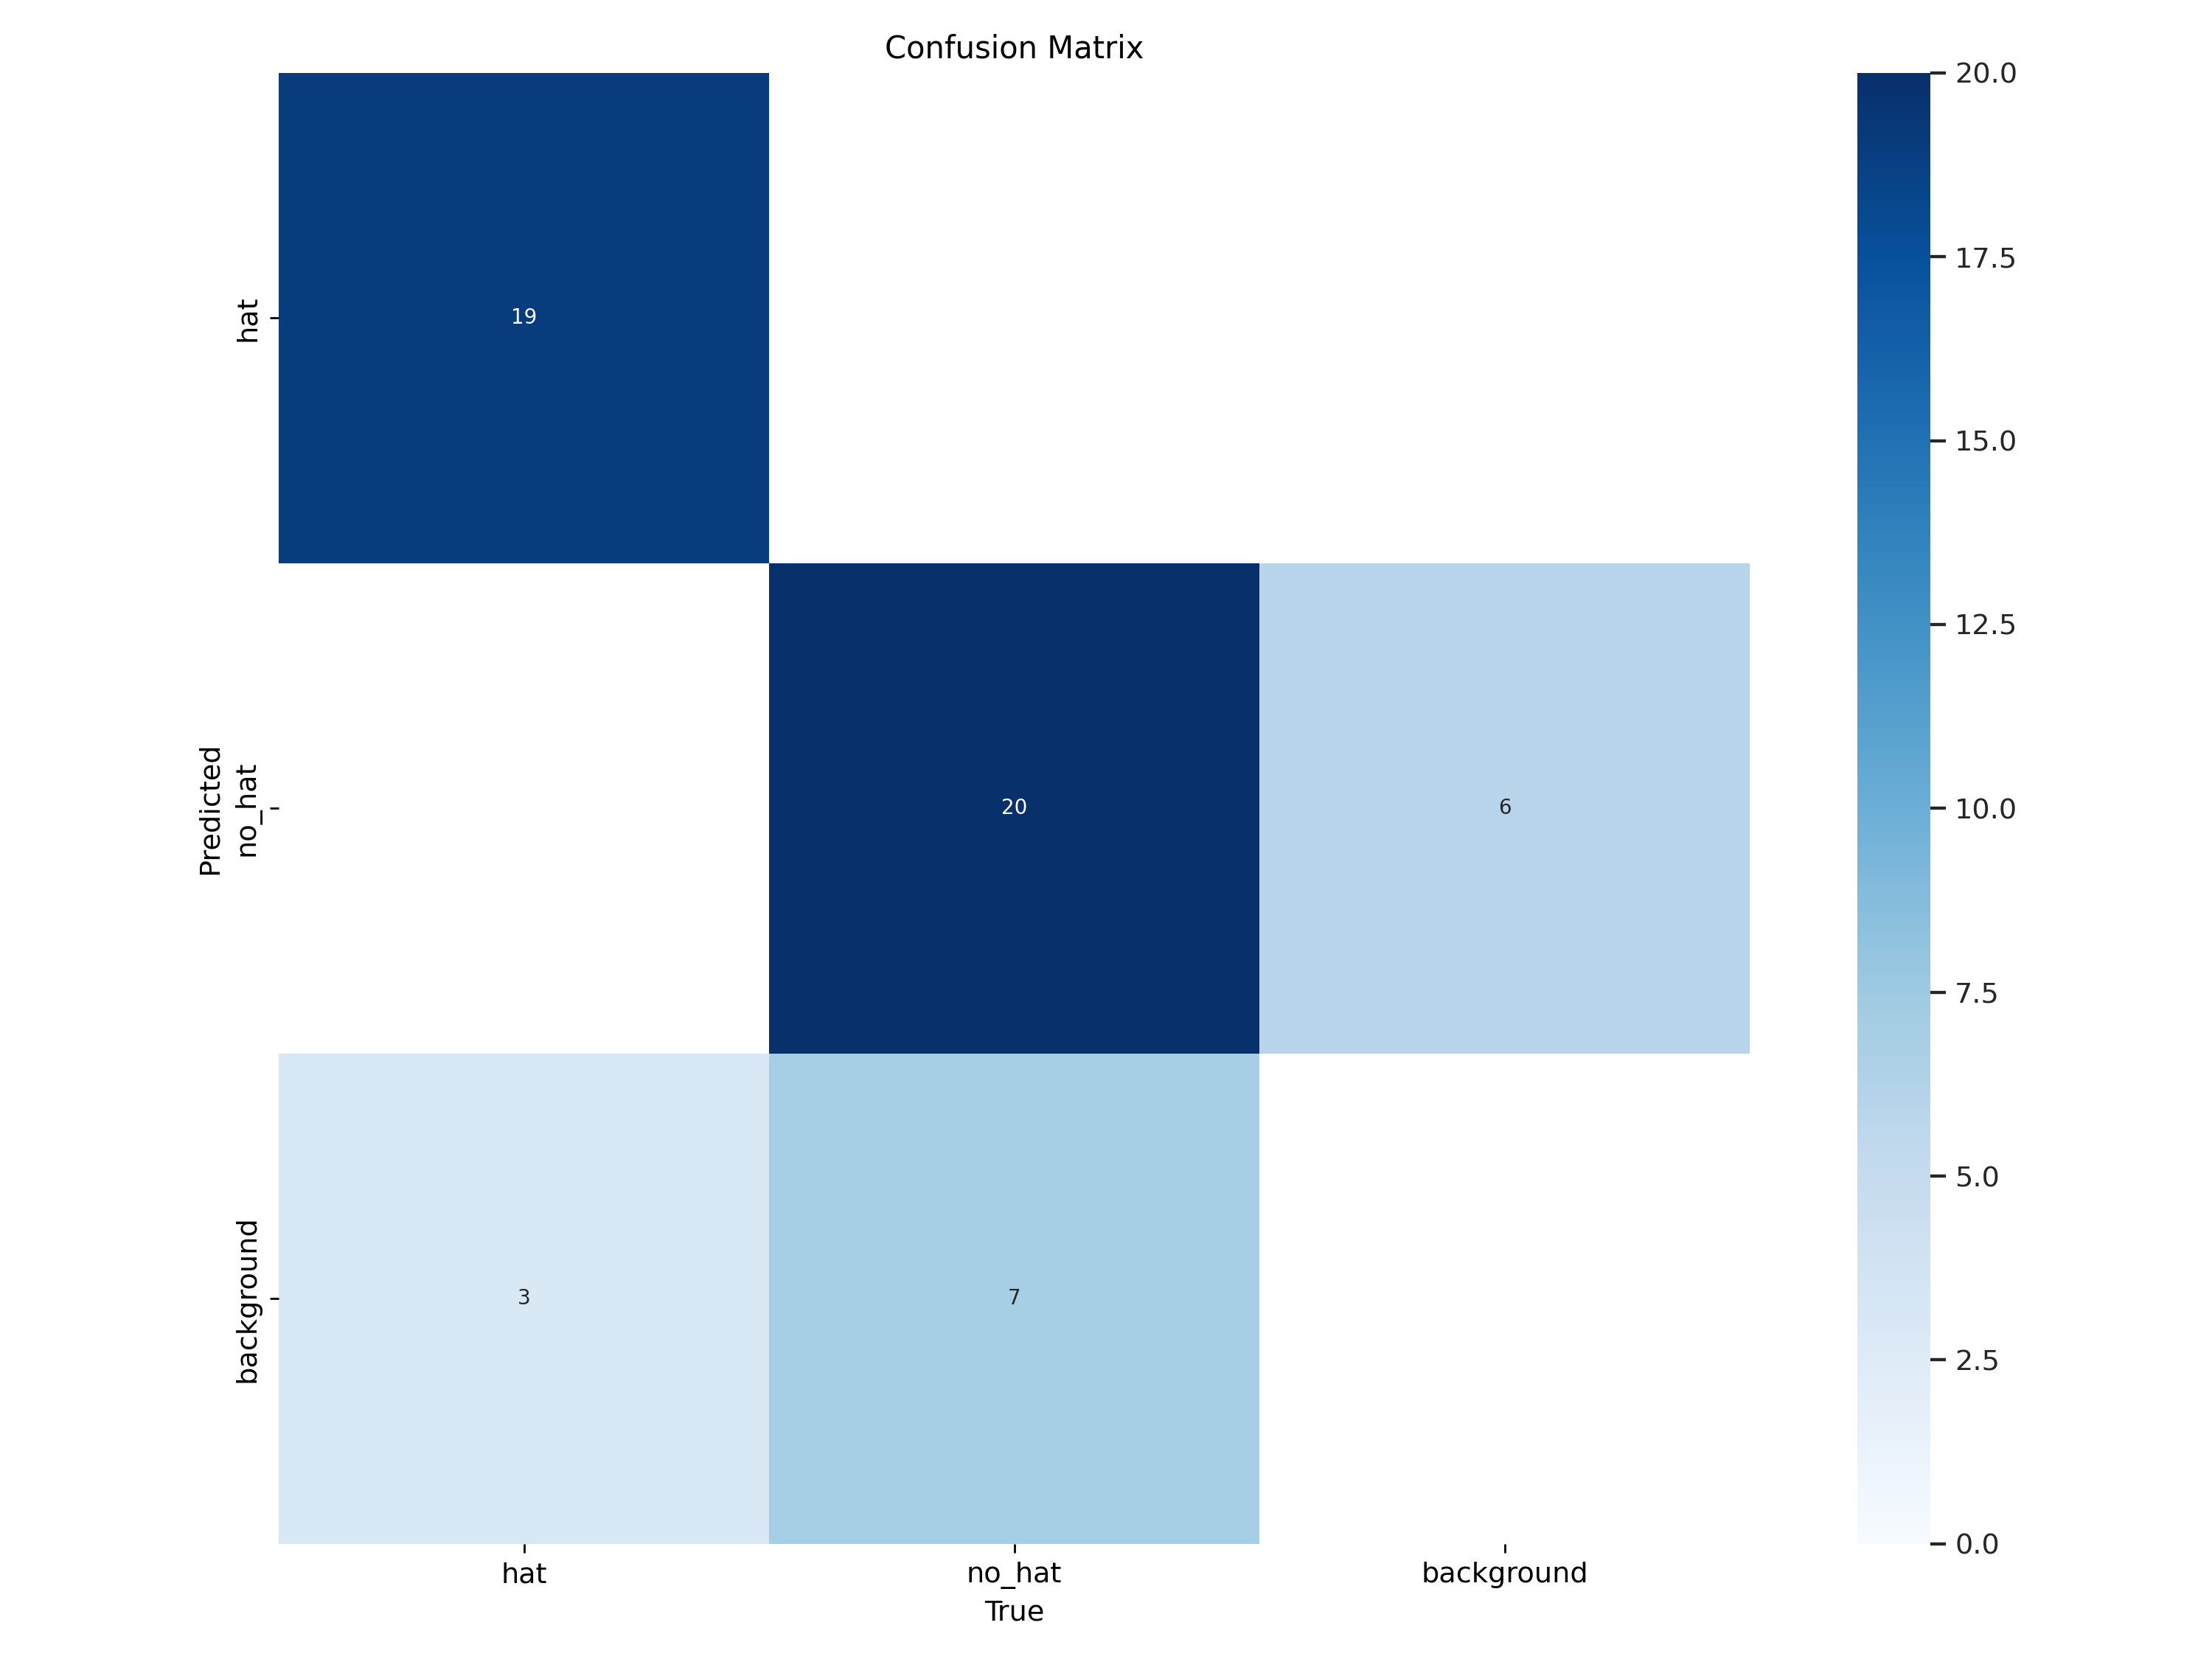

In [42]:
Image(filename = f'/content/runs/detect/train/confusion_matrix.png')

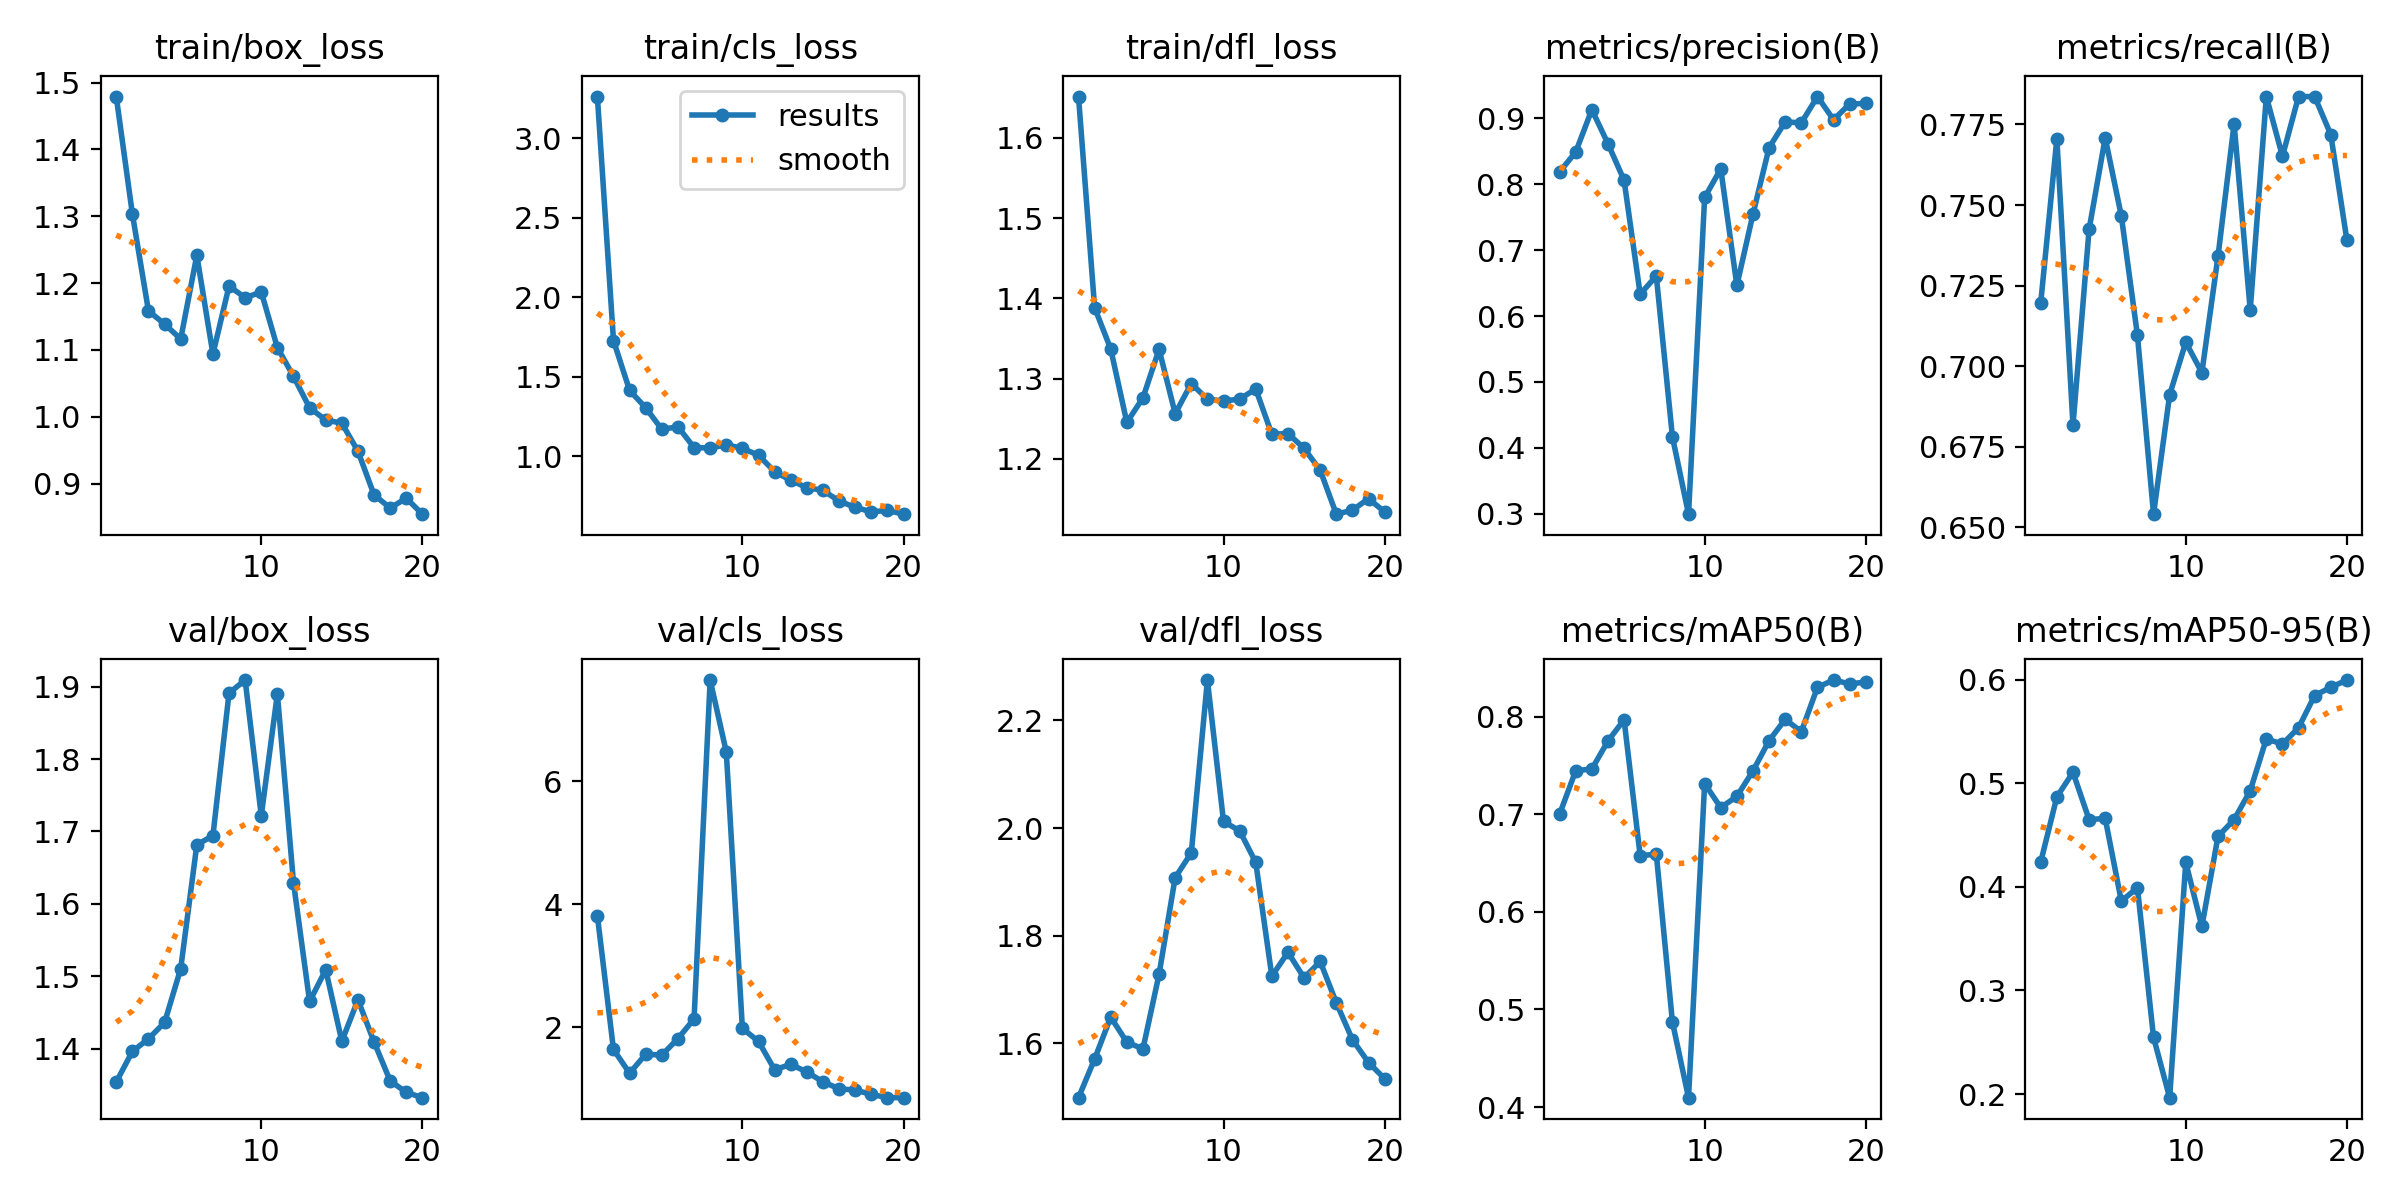

In [43]:
Image(filename = f'/content/runs/detect/train/results.png' )

In [51]:
#validate the model based on the validation dataset

!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/drive/My\ Drive/yolo\ hat\ detection/data.yaml

Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/My Drive/yolo hat detection/data/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:31<00:00, 10.56s/it]
                   all         40         49      0.922      0.739      0.835        0.6
                   hat         40         22      0.946      0.818      0.885      0.665
                no_hat         40         27      0.899      0.661      0.786      0.534
Speed: 11.8ms preprocess, 636.8ms inference, 0.0ms loss, 108.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [52]:
#import/save the trained model into your google drive directory

!scp -r /content/runs '/content/drive/My Drive/yolo hat detection'